## 540:540 – Computational Methods – Spring 2021 Final Exam

### Using Python programming language do the following:
#### 1. Load the IRIS classification dataset provided on scikit-learn library.
#### 2. Split the dataset into training (50%), validation (20%), and testing (30%).
#### 3. Construct a classification model for the IRIS dataset using:
##### a. Support Vector Machines (use RBF kernel)
##### b. Decision Tree
##### c. Artificial Neural Network (MLP): use the sigmoid function as an activation
### function and only three layers (input, one intermediate, output).
### - Show the works about how you optimized the parameters of the above three methods using the validation data. You can try some combinations of parameters that are chosen by yourself.
### - Kindly report the training, validation, and testing accuracies of your models after optimization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
iris = datasets.load_iris()
# Convert the dataset to dataframe with adjustment
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df[['target', 'species', "sepal length (cm)",	"sepal width (cm)",	"petal length (cm)","petal width (cm)"]]
df.head()

,target,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,setosa,5.1,3.5,1.4,0.2
1,0.0,setosa,4.9,3.0,1.4,0.2
2,0.0,setosa,4.7,3.2,1.3,0.2
3,0.0,setosa,4.6,3.1,1.5,0.2
4,0.0,setosa,5.0,3.6,1.4,0.2


In [3]:
X = df.iloc[:,2:] #data
y = df.iloc[:,0] #target

In [4]:
from sklearn.model_selection import train_test_split

# Split the iris dataset into training (50%), validation (20%), and testing (30%)

train_ratio = 0.5
validation_ratio = 0.3
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=validation_ratio/(test_ratio + validation_ratio)) 

x_train.shape,y_val.shape,y_test.shape

((75, 4), (30,), (45,))

In [5]:
# a. Classification model for the IRIS dataset using Support Vector Machines (use RBF kernel) 

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score

svc_rbf = SVC(kernel='rbf', C=1e4, gamma=0.1)

y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)

In [6]:
print("With rbf kernel，R2 score is:", r2_score(y_test, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))

With rbf kernel，R2 score is: 0.9665676077265973 ,Mean squared error: 0.02 ,the Variance score: 0.97(best fit = 1)


In [7]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_rbf))
print(classification_report(y_test, y_rbf))

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.93      0.97        15
         2.0       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [8]:
# b. Classification model for the IRIS dataset using decision trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=123)
y_clf = clf.fit(x_train, y_train).predict(x_test)

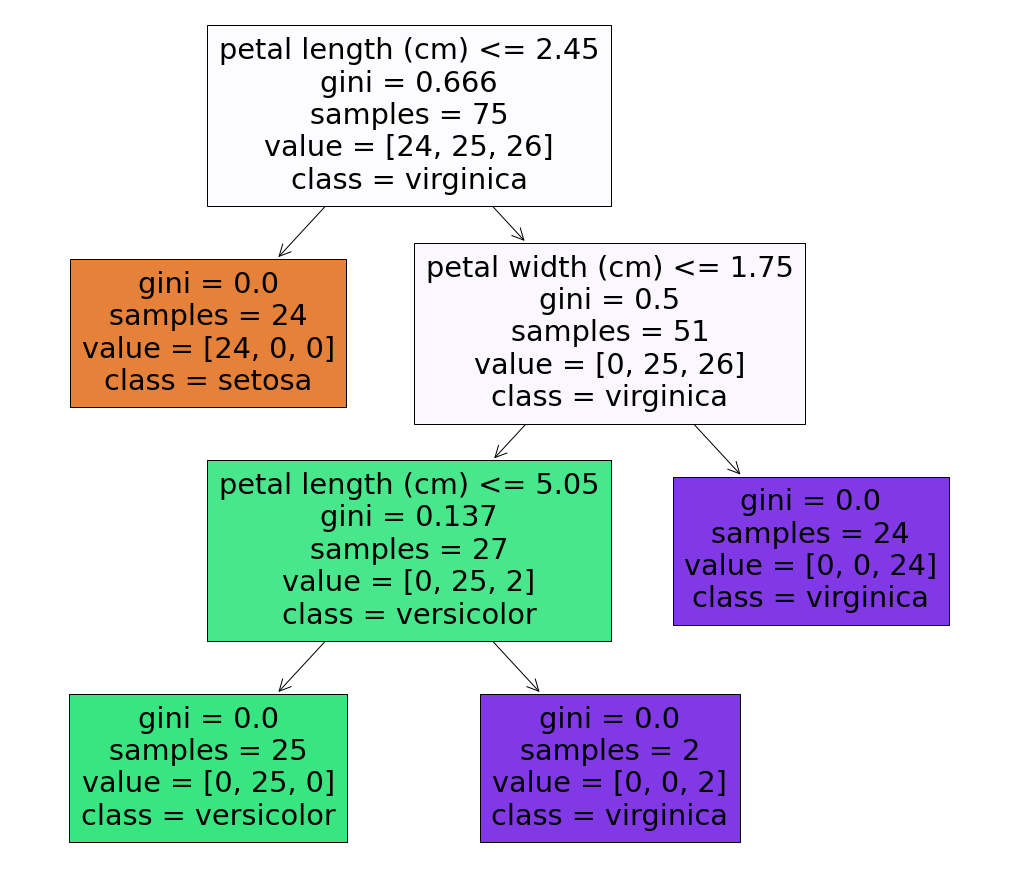

In [9]:
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [10]:
print("With Decision tree classification，R2 score is:", r2_score(y_test, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_clf))

With Decision tree classification，R2 score is: 0.9331352154531947 ,Mean squared error: 0.04 ,the Variance score: 0.93(best fit = 1)


In [11]:
print(confusion_matrix(y_test, y_clf))
print(classification_report(y_test, y_clf))

[[14  0  0]
 [ 0 14  1]
 [ 0  1 15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.93      0.93      0.93        15
         2.0       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [12]:
# c. Classification model for the IRIS dataset using Artificial Neural Network (MLP)(use the sigmoid function as an activation)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3),activation='logistic',solver='adam',max_iter=10000)

In [13]:
y_mlp = mlp.fit(x_train, y_train).predict(x_test)

In [14]:
print(confusion_matrix(y_test,y_mlp))
print(classification_report(y_test,y_mlp))

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.93      0.97        15
         2.0       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [15]:
print("With ANN method，R2 score is:", r2_score(y_test, y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_test, y_mlp),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_mlp))

With ANN method，R2 score is: 0.9665676077265973 ,Mean squared error: 0.02 ,the Variance score: 0.97(best fit = 1)


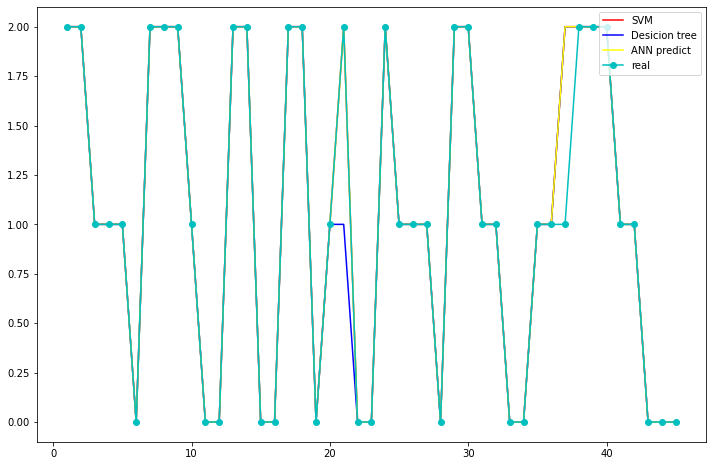

In [16]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="SVM")
plt.plot(x_s, y_clf, color='blue',label="Desicion tree")
plt.plot(x_s, y_mlp,color='yellow',label="ANN predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [54]:
cross_val_score(mlp, x_val, y_val, cv=8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
cross_val_score(svc_rbf, x_val, y_val, cv=8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
cross_val_score(clf, x_val, y_val, cv=8)

array([1.  , 0.75, 0.75, 1.  , 0.5 , 0.5 , 1.  , 1.  ])

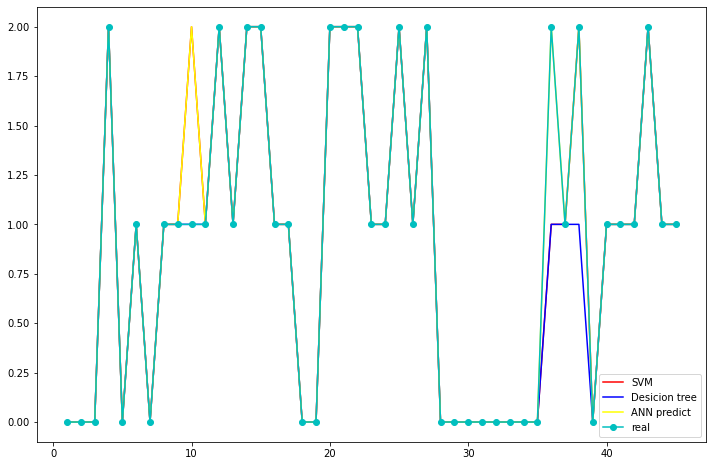